In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, auc, classification_report
from sklearn.linear_model import RidgeCV
import sys
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
log_data_raw = pd.read_csv("../data/Hate_crime1/combined_data_processed_data.csv")

In [3]:
log_data = log_data_raw.sample(10000)

In [4]:
log_data["OFFENDER_RACE"].value_counts().index

Index(['Unknown', 'White', 'Black or African American', 'Multiple', 'Asian',
       'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'],
      dtype='object')

In [5]:
log_data = pd.get_dummies(log_data, columns=["POPULATION_GROUP_DESC","OFFENDER_RACE","BIAS_DESC"])



In [6]:
log_data.head(5)

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,SEVERITY,"POPULATION_GROUP_DESC_Cities 1,000,000 or over","POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999","POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999","POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999","POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999","POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999","POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999",...,BIAS_DESC_Anti-Native Hawaiian or Other Pacific Islander,BIAS_DESC_Anti-Other Christian,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry;Anti-White,BIAS_DESC_Anti-Other Religion,BIAS_DESC_Anti-Physical Disability,BIAS_DESC_Anti-Protestant,BIAS_DESC_Anti-Sikh,BIAS_DESC_Anti-Transgender,BIAS_DESC_Anti-White
383350,1,2,Violent,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
100695,1,1,Violent,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
408422,1,1,Violent,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274095,2,5,Violent,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
203619,0,1,Non-Violent,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
log_data.columns
log_data.to_csv('log_data.csv', index=False)

In [8]:
log_data.drop(["OFFENDER_RACE_Unknown","POPULATION_GROUP_DESC_Cities 1,000,000 or over","BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry"], axis = 1)

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,SEVERITY,"POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999","POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999","POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999","POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999","POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999","POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999","POPULATION_GROUP_DESC_Cities from 500,000 thru 999,999",...,"BIAS_DESC_Anti-Multiple Religions, Group",BIAS_DESC_Anti-Native Hawaiian or Other Pacific Islander,BIAS_DESC_Anti-Other Christian,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry;Anti-White,BIAS_DESC_Anti-Other Religion,BIAS_DESC_Anti-Physical Disability,BIAS_DESC_Anti-Protestant,BIAS_DESC_Anti-Sikh,BIAS_DESC_Anti-Transgender,BIAS_DESC_Anti-White
383350,1,2,Violent,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100695,1,1,Violent,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408422,1,1,Violent,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274095,2,5,Violent,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
203619,0,1,Non-Violent,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281210,2,1,Violent,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50352,1,2,Violent,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
425853,1,1,Violent,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
389515,1,1,Violent,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
min_max = MinMaxScaler()
log_data[["TOTAL_OFFENDER_COUNT", "VICTIM_COUNT"]] = min_max.fit_transform(log_data[["TOTAL_OFFENDER_COUNT", "VICTIM_COUNT"]])


In [10]:
print(log_data.head())

        TOTAL_OFFENDER_COUNT  VICTIM_COUNT     SEVERITY  \
383350              0.043478      0.005025      Violent   
100695              0.043478      0.000000      Violent   
408422              0.043478      0.000000      Violent   
274095              0.086957      0.020101      Violent   
203619              0.000000      0.000000  Non-Violent   

        POPULATION_GROUP_DESC_Cities 1,000,000 or over  \
383350                                               0   
100695                                               0   
408422                                               0   
274095                                               0   
203619                                               0   

        POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999  \
383350                                                  0      
100695                                                  0      
408422                                                  0      
274095                                  

In [11]:
log_data.value_counts()

TOTAL_OFFENDER_COUNT  VICTIM_COUNT  SEVERITY     POPULATION_GROUP_DESC_Cities 1,000,000 or over  POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999  POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999  POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999  POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999  POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999  POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999  POPULATION_GROUP_DESC_Cities from 500,000 thru 999,999  POPULATION_GROUP_DESC_Cities under 2,500  POPULATION_GROUP_DESC_MSA State Police  POPULATION_GROUP_DESC_MSA counties 100,000 or over  POPULATION_GROUP_DESC_MSA counties from 10,000 thru 24,999  POPULATION_GROUP_DESC_MSA counties from 25,000 thru 99,999  POPULATION_GROUP_DESC_MSA counties under 10,000  POPULATION_GROUP_DESC_Non-MSA State Police  POPULATION_GROUP_DESC_Non-MSA counties 100,000 or over  POPULATION_GROUP_DESC_Non-MSA counties from 10,000 thru 24,999  POPULATION_GROUP_DESC_Non-MSA counties from 25,000 thr

In [12]:
y = log_data['SEVERITY']
X = log_data.drop("SEVERITY", axis =1)


In [13]:
y

383350        Violent
100695        Violent
408422        Violent
274095        Violent
203619    Non-Violent
             ...     
281210        Violent
50352         Violent
425853        Violent
389515        Violent
369253        Violent
Name: SEVERITY, Length: 10000, dtype: object

In [14]:
X


,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,"POPULATION_GROUP_DESC_Cities 1,000,000 or over","POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999","POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999","POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999","POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999","POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999","POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999","POPULATION_GROUP_DESC_Cities from 500,000 thru 999,999",...,BIAS_DESC_Anti-Native Hawaiian or Other Pacific Islander,BIAS_DESC_Anti-Other Christian,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry;Anti-White,BIAS_DESC_Anti-Other Religion,BIAS_DESC_Anti-Physical Disability,BIAS_DESC_Anti-Protestant,BIAS_DESC_Anti-Sikh,BIAS_DESC_Anti-Transgender,BIAS_DESC_Anti-White
383350,0.043478,0.005025,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100695,0.043478,0.000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408422,0.043478,0.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274095,0.086957,0.020101,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
203619,0.000000,0.000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281210,0.086957,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50352,0.043478,0.005025,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
425853,0.043478,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
389515,0.043478,0.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [16]:
logreg.feature_names_in_

array(['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT',
       'POPULATION_GROUP_DESC_Cities 1,000,000 or over',
       'POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999',
       'POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999',
       'POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999',
       'POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999',
       'POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999',
       'POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999',
       'POPULATION_GROUP_DESC_Cities from 500,000 thru 999,999',
       'POPULATION_GROUP_DESC_Cities under 2,500',
       'POPULATION_GROUP_DESC_MSA State Police',
       'POPULATION_GROUP_DESC_MSA counties 100,000 or over',
       'POPULATION_GROUP_DESC_MSA counties from 10,000 thru 24,999',
       'POPULATION_GROUP_DESC_MSA counties from 25,000 thru 99,999',
       'POPULATION_GROUP_DESC_MSA counties under 10,000',
       'POPULATION_GROUP_DESC_Non-MSA State Police',
       'POPULATION_GROUP_DESC_Non-MSA cou

In [17]:
logreg.coef_

array([[ 2.48767757,  1.31355016,  0.29316961,  0.06662463,  0.02251859,
         0.05336476,  0.08208585,  0.43630212,  0.1792715 ,  0.43196828,
        -0.17022885,  0.12581319, -0.26367522, -0.56607522, -0.22737079,
        -0.0896172 , -0.17585512, -0.1418722 ,  0.07001087,  0.10482312,
        -0.20109744, -0.1877315 ,  0.54471287,  0.60726984,  0.30816776,
         0.24190698, -1.72880864,  0.24464315, -0.72985593,  0.76579316,
         0.87013737,  0.53122723,  0.56087712,  0.17210444, -0.5456602 ,
         0.25592943, -0.29845119,  0.46358801, -0.2792245 ,  0.21390076,
         0.20521061, -0.71250805,  0.53429918, -0.27702221,  0.82673772,
         0.3468006 ,  0.51179238, -0.16363404,  0.51179238, -0.76581156,
         0.1295673 , -1.47194402, -0.04403557,  0.14323794,  0.20961898,
         0.9208203 ,  0.25131874,  0.57331016, -0.2256157 , -0.10200682,
         0.70277506,  0.42525701,  0.34036398, -0.28079957, -0.51006867,
        -0.48115257,  0.20693357,  0.27022823,  0.6

In [18]:
coef_df = pd.Series(logreg.coef_[0], index=logreg.feature_names_in_)

In [19]:
coef_df.sort_values()

OFFENDER_RACE_Unknown                                            -1.728809
BIAS_DESC_Anti-Eastern Orthodox (Russian, Greek, Other)          -1.471944
BIAS_DESC_Anti-Sikh                                              -1.214678
BIAS_DESC_Anti-Protestant                                        -1.091208
BIAS_DESC_Anti-Multiple Religions, Group                         -1.089560
                                                                    ...   
BIAS_DESC_Anti-Black or African American;Anti-Lesbian (Female)    0.826738
BIAS_DESC_Anti-Arab;Anti-Islamic (Muslim)                         0.870137
BIAS_DESC_Anti-Gay (Male)                                         0.920820
VICTIM_COUNT                                                      1.313550
TOTAL_OFFENDER_COUNT                                              2.487678
Length: 85, dtype: float64

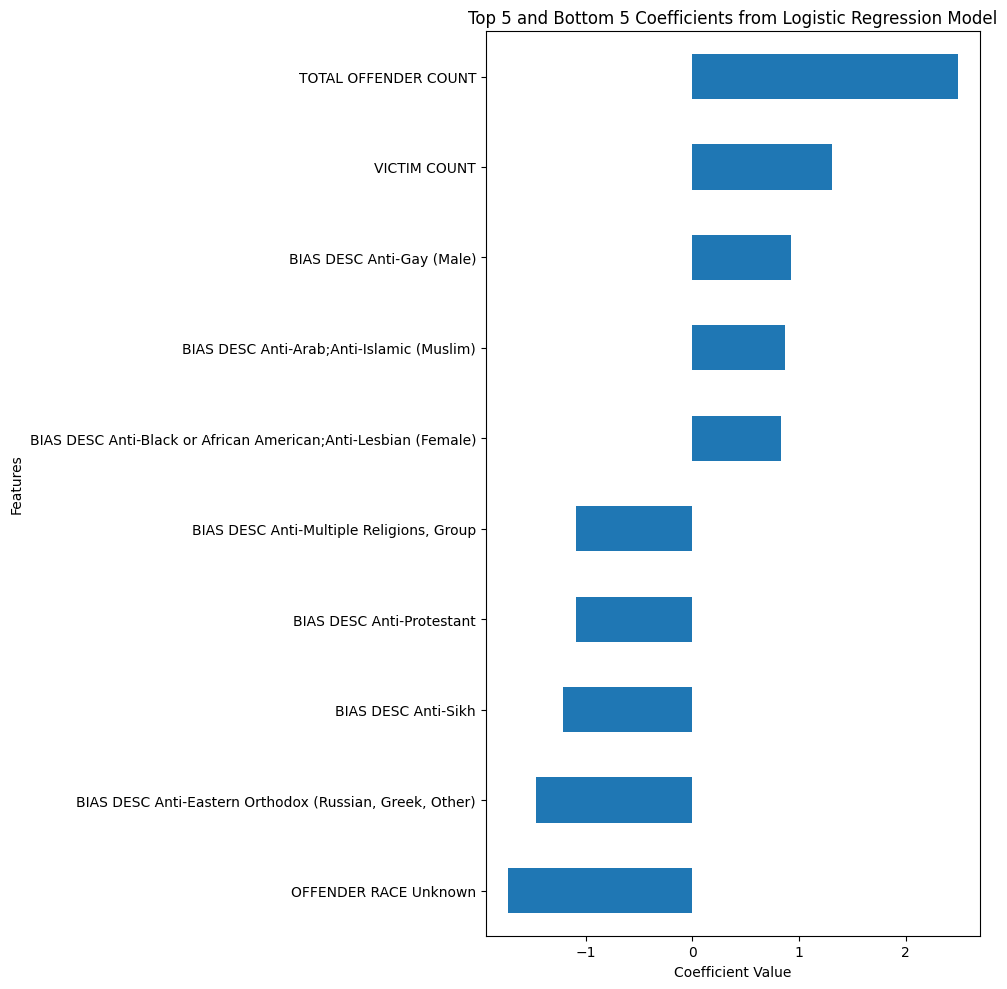

In [20]:
plt.figure(figsize=(10, 10))
top_coef_df = coef_df.sort_values(ascending=False).head(5)
bottom_coef_df = coef_df.sort_values(ascending=True).head(5)
combined_coef_df = pd.concat([top_coef_df, bottom_coef_df])

# Remove underscores from feature names
combined_coef_df.index = combined_coef_df.index.str.replace('_', ' ')

combined_coef_df.sort_values().plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Top 5 and Bottom 5 Coefficients from Logistic Regression Model')
plt.tight_layout()
plt.show()
